<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Model/Bagged_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

In [3]:
#Load the Dataset
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/cali_housing.csv"
df = pd.read_csv(fpath)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
X=df.drop(columns="MedHouseVal")
y=df["MedHouseVal"]
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33


#Make an instance of the Model

In [5]:
#Instantiating Bagging Regressor
bagreg = BaggingRegressor(random_state=42)

In [6]:
# Look at the hyperparameters
bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#Fit the model on Training Data

In [7]:
#Fit the model to training data set
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

#Predict the values for y

In [8]:
#Predicting on X training and testing data on BagRegression model
train_preds = bagreg.predict(X_train)
test_preds = bagreg.predict(X_test)

#Evaluate model performance

In [9]:
#Using R2 to find variance btw actual y and predicted y
bagreg_train_score = r2_score(y_train, train_preds)
bagreg_test_score = r2_score(y_test, test_preds)
print(bagreg_train_score)
print(bagreg_test_score)

0.9612123478289769
0.7893591786740191


# Tune the Model

In [10]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=["Train Score", "Test Score"])
# Iterate through the values to find the best number of estimators
for num_estimator in estimators:
    bag_reg = BaggingRegressor(n_estimators=num_estimator, random_state=42)
    bag_reg.fit(X_train, y_train)
    train_preds = bag_reg.predict(X_train)
    test_preds = bag_reg.predict(X_test)
    bagreg_train_score = r2_score(y_train, train_preds)
    bagreg_test_score = r2_score(y_test, test_preds)
    scores.loc[num_estimator, "Train Score"] = bagreg_train_score
    scores.loc[num_estimator, "Test Score"] = bagreg_test_score
    print(f"The num estimator: {num_estimator} ")
    print(f" - Train Score {bagreg_train_score.round(3)}.")
    print(f" - Test Score {bagreg_test_score.round(3)}.")

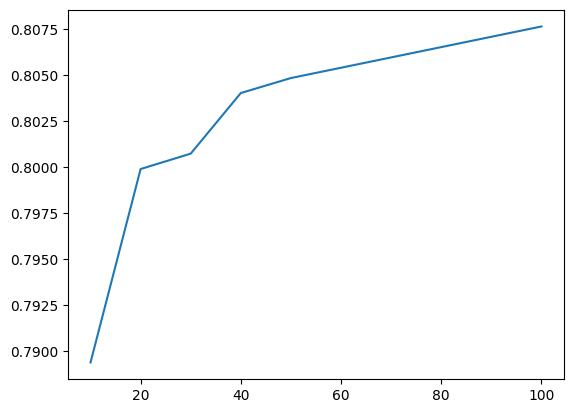

In [11]:
## Plot the scores
plt.plot(scores["Test Score"]);
plt.show()

In [12]:
# Sort by test score
scores = scores.sort_values(by="Test Score", ascending=False)
scores

,Train Score,Test Score
100,0.972597,0.807639
50,0.971767,0.804834
40,0.97107,0.804019
30,0.969957,0.800722
20,0.967738,0.799884
10,0.961212,0.789359


In [13]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators = best_n_estimators, random_state=42)
bag_reg_tuned.fit(X_train,y_train)
# Evaluate the model
train_preds = bag_reg_tuned.predict(X_train)
test_preds = bag_reg_tuned.predict(X_test)
print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.9725967543259312
0.8076392531442703
